# Uncertainties

Often times, the purpose of an experiment is to verify if a model captures some aspect of reality, and with what accuracy it does.

The second aspect is almost as important as the first one, without some notion of how reliable the result from an experiment is, any experiment becomes almost worthless.

Invariably, the first step to assess the reliability of a result is to link your measurement to a model

### What are we really measuring in the g-lab?

In the g-lab we measured timed displacements for a falling body. The model we have seen in class for this situation is that of movement under constant acceleration (free-fall). Under this model, the position of the object, as a function of time, is given by:

$$x(t) = x_0 + v_0 (t-t_0) - \frac{g}{2}(t-t_0)^2$$

Alas, this is not what we measure. First, we are only capturing the movement at a discrete series of points in time (when the spark fires), that is, 

$$x(t_i)\equiv x_i = x_0 + v_0 (t_i-t_0) - \frac{g}{2}(t_i-t_0)^2$$

Second, we are not really measuring the positions, but the difference in position between two consecutive sparks, or distance travelled in each interval. If we consider two consetive instants in time, and taking our time origin as $t_0=0$, we have: 

$$x_i     = x_0 + v_0 t_i - \frac{g}{2}t_i^2$$
$$x_{i+1} = x_0 + v_0 t_{i+1} - \frac{g}{2}t_{i+1}^2$$

If we subtract the first from the second equation, we get the distance over one interval

$$x_{i+1} - x_i \equiv \Delta x_i = v_0 (t_{i+1}-t_i) - \frac{g}{2}(t_{i+1}^2  - t_i^2)$$

Now, the time interval between two consecutive sparks is constant, and we can call it $\Delta t = t_{i+1} - t_i$

$$\Delta x_i = v_0 \Delta t - \frac{g}{2} (t_{i+1} - t_i) (t_{i+1} + t_i)$$
$$\Delta x_i = v_0 \Delta t - \frac{g}{2} \Delta t (t_i + \Delta t + t_i)$$
$$\Delta x_i = v_0 \Delta t - \frac{g}{2} \Delta t (2t_i + \Delta t)$$

The average speed in each interval, is

$$v_i = \frac{\Delta x_i}{\Delta t} = v_0 - \frac{g}{2}(2t_i + \Delta t)$$
$$v_i = v_0 - g t_i + \frac{g}{2}\Delta t$$

Notice that this formula ONLY matches what you know as the instantaneous velocity in the limit $\Delta t \rightarrow 0$

In the lab handout, we are asked to compute the increase in the the average speed between consecutive intervals. This we know is the average acceleration, but since we expect the acceleration to be a constant, it should yield the same result as the constant acceleration:

$$a_i = \frac{\Delta v_i}{\Delta t}$$

For two consecutive times, we have the following average velocities:
$$v_i     = v_0 - g t_i     + \frac{g}{2}\Delta t$$
$$v_{i+1} = v_0 - g t_{i+1} + \frac{g}{2}\Delta t$$

$$\Delta v_i \equiv v_{i+1} - v_i = -g (t_{i+1} - t_i) = -g \Delta t$$

$$a_i = -g$$

We get that the last column of the table is a direct measurement of g

### A noisy measurement

This is what those measurements look like

In [244]:
# Some imports from libraries we will use in this notebook

import numpy
import astropy.units as u

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [245]:
# Let's load the data
data = numpy.genfromtxt('g_data.csv', delimiter=',')[1:]

# We have several teams
teams = numpy.unique(data[:,2])

# Time interval between sparks is the same for each team
dt = 1 / 60   # s

# Let's do some data processing
avg_speed, avg_accel = [], []
for team in teams:
    # slice the data
    sub_data = data[data[:,2]==team]
    # estimate the average speed in each interval
    v_i = sub_data[:,1] / dt   # cm/s
    # estimate the average acceleration (which remember is equal to the acceleration)
    a_i = (v_i[1:] - v_i[:-1]) / dt   # cm/s2
    
    # append data
    for i in range(len(v_i)):
        avg_speed.append([sub_data[i,0] * dt, v_i[i], team])
    for i in range(len(a_i)):
        avg_accel.append([sub_data[i,0] * dt, a_i[i], team])

avg_speed = numpy.array(avg_speed)
avg_accel = numpy.array(avg_accel)

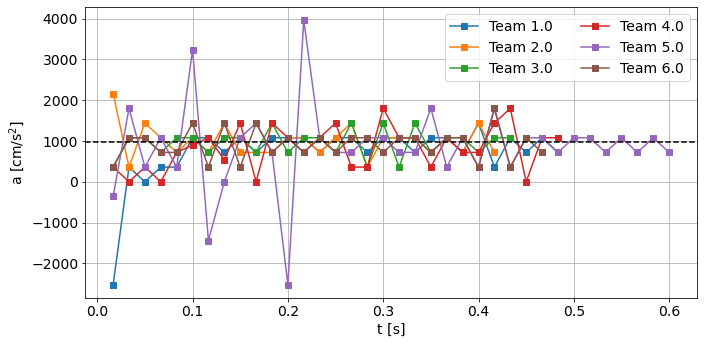

In [246]:
# Now, let's have a look at the average accelerations measured
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
for team in teams:
    data_plot = avg_accel[avg_accel[:,2]==team]
    ax.plot(data_plot[:,0], data_plot[:,1], marker='s', label=r'Team {}'.format(team))
ax.axhline(981, color='k', linestyle='--')
ax.legend(loc=1,ncol=2), ax.grid(), ax.set_ylabel(r'a [cm/s$^2$]'), ax.set_xlabel(r't [s]')
plt.tight_layout()

This looks like a hot mess, with some serious outliers (more later on why that is the case)

One reason can be that there may be errors in the measurement. These errors tend to be random in nature, and it would be helpful to see if the measurements seem to cluster around some values. One way to do so is to look at the measurements' histograms:

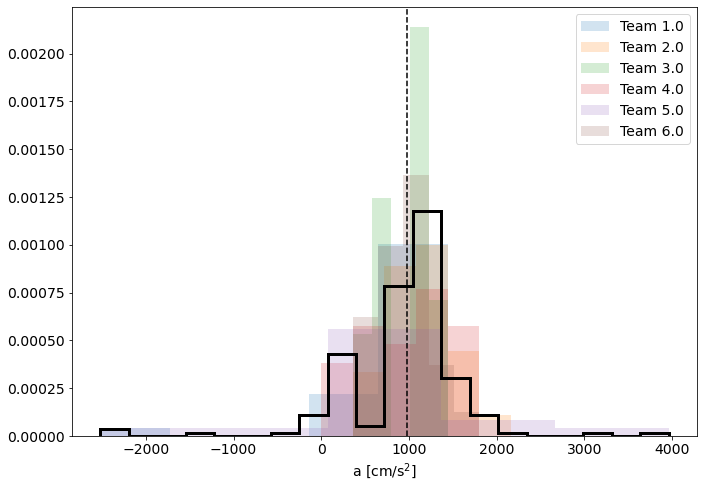

In [247]:
# Let's look at the histogram
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,7))
ax  = fig.add_subplot(111)
for team in teams:
    data_plot = avg_accel[avg_accel[:,2]==team]
    ax.hist(data_plot[:,1], alpha=0.2, density=True, bins=5, label=r'Team {}'.format(team))
a = ax.hist(avg_accel[:,1], histtype='step', color='k', linewidth=3, density=True, bins=20)
ax.axvline(981, color='k', linestyle='--'), ax.set_xlabel(r'a [cm/s$^2$]'), ax.legend(loc=1)
plt.tight_layout()

These distributions, at the very least, can be characterized by:

- The 'central' value that seems to be the most common / likely
- An estimate of the range of values / width of the measurements' distribution

For the first, we use the (sample) mean:

$$<A> = \frac{1}{N}\sum_{i=1}^{i=N}A_i$$

For the second, we use the (sample) standard deviation:

$$S_A = \sqrt{\frac{1}{N-1}\sum_{i=1}^{i=N}\left(A_i - <A>\right)^2}$$

The standard deviation gives an idea of the uncertainty involved in each measurement of the acceleration. Now, we are not using a single measurement to estimate $g$, but all the measurements, and we use the mean of these. Then, we are not interested in the error of the random variable, but on the error of the random variable's mean.

For "normal" errors, the standard deviation scales as the inverse of the square root of the number of measurements:

$$S_{<A>} = \frac{S_A}{\sqrt{N}}$$

The reason is that, when computing averages, you are using many "independend" measurements, and it is reasonable to expect the uncertainty to be reduced (it is straightforward to show by how much when uncertainties follow a "normal" or Gaussian distribution).

You can see how the error on your mean, can de decreased arbitrarily by increasing the number of data points, or running your experiment more times. That usually involves a higher cost (for example, people running experiments usually receive a salary). Different sciences have different thresholds of error to call a new discovery. In physics, a new discovery is claimed when the result is significant to 5 standard deviations (5 "sigma" if the error is Gaussian). That means that the result would be just the outcome of random luck one time in roughly one in 3.5 million. Other disciplines have lower thresholds (it may be more expensive, or outright impossible to lower your errors further). In Astronomy, for example, the threshold is usually 3 sigma (there is a 2% chance that the result is just luck).

Let's see how our experimental results look like, based on the direct estimator of the acceleration we have computed:

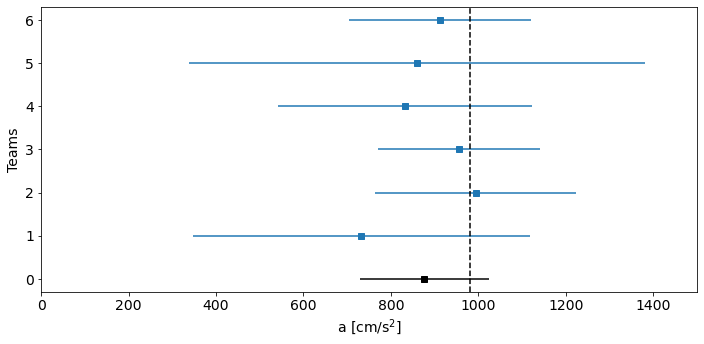

In [248]:
# Let's compute the means and standard deviations for each team, and globally
means, stderrs = [], []
for team in teams:
    temp_data = avg_accel[avg_accel[:,2]==team]
    means.append(numpy.mean(temp_data[:,1]))
    stderrs.append(numpy.std(temp_data[:,1]) / numpy.sqrt(len(temp_data)))
means   = numpy.array(means)
stderrs = numpy.array(stderrs)

# And let's show the results
n_sigma = 3
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
ax.errorbar(x=means, y=teams, xerr=n_sigma * stderrs, linestyle='none', marker='s')
ax.errorbar(x=numpy.mean(avg_accel[:,1]), y=0, 
            xerr=n_sigma * numpy.std(avg_accel[:,1])/numpy.sqrt(len(avg_accel)),
            marker='s', color='k')
ax.axvline(981, color='k', linestyle='--')

ax.set_xlim(0, 1500)
ax.set_xlabel(r"a [cm/s$^2$]"), ax.set_ylabel(r"Teams")
plt.tight_layout()

It seems that the results of all the teams are consistent with the generally accepted value to within 3 standard deviations.

This is not very encouraging, though, for the errors seem to be very large compared with the "signal" we are trying to measure:

In [249]:
print("Standard errors:")
out = [print('{:.2f} %'.format(x)) for x in 100*stderrs/means]

Standard errors:
17.53 %
7.75 %
6.46 %
11.63 %
20.23 %
7.58 %


Is the source of all those errors just uncertainties in the experiment, or could our way to analyze the data matter?

### A less noisy estimator

We know that, for a movement with uniform acceleration, the instantaneous velocity should be a straight line, and the slope of that straight line is the acceleration.

The lab handout asks us to plot the "average" velocity we computed for each time interval, as a function of time. Note that this is NOT the same thing as the velocity. Before we saw:

$$v_i = v_0 - g t_i + \frac{g}{2}\Delta t$$

We can re-arrange terms and get:

$$v_i = \left( v_0 + \frac{g}{2}\Delta t \right) + g t_i  = a + b t_i$$

Which is still the equation of a straight line, with a slope equal to the acceleration we are trying to measure. Note that even if the initial velocity is zero, there will be a non-zero intercept for the line. In our case, the expected value for that minimum intercept is going to be small:

$$a_{min} = \frac{g}{2}\Delta t = \frac{981}{2}\mathrm{\frac{cm}{s^2}}\frac{1}{60}\mathrm{s} = 8.175\mathrm{\frac{cm}{s}}$$

This gives us an alternative method to measure gravity: fit a line to the data points $\{v_i, t_i\}$, and then measure the slope.

In [250]:
from ipywidgets import interact, interactive, fixed

# Parameters for this demo
teams  = [ 0,   1,   2,   3,   4,   5,        6]
colors = ['k', 'm', 'b', 'c', 'g', 'orange', 'r']

@interact(a=(-100, 100, 10), b=(500, 1500, 10), team=(0,6), data=fixed(avg_speed))
def manual_fit(a, b, team, data):
    
    # data is avg_speed = [ti, vi, team]
    # select the data to plot
    if team==0:
        data_plot = data
    else:
        data_plot = data[data[:,2]==team]
        
    # plot a line
    t_i, t_f = data_plot[:,0][0], data_plot[:,0][-1]
    v_i = a + b * t_i
    v_f = a + b * t_f
    
    # plot data
    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot(111)
    ax.scatter(data_plot[:,0], data_plot[:,1], marker='o', color=colors[team])
    ax.plot([t_i, t_f], [v_i, v_f])
    
    ax.set_xlabel(r"t [s]"), ax.set_ylabel(r"<v> [cm/s]")
    ax.set_ylim((-100,800))
    ax.grid()
    
    plt.show()

interactive(children=(IntSlider(value=0, description='a', min=-100, step=10), IntSlider(value=1000, descriptio…

Intuitively, the best "fit" will be reached when the line passes the closest to all the points. For each point, we can then measure the distance bewteen the point and the line:

$$d_i = v_i - \left(a + b t_i\right)$$

This distance can be positive, or negative. That would "cancel" errors, which is not something we want to do. One way to avoid that is to "square" those differences. If we do so, the error for a single data point would be:

$$\epsilon_i =  \left(v_i - \left(a + b t_i\right)\right)^2$$

And we can add the errors for each data point to get an overall error:

$$\mathrm{E} = \sum_{i=1}^{i=N} \epsilon_i = \sum_{i=1}^{i=N} \left(v_i - \left(a + b t_i\right)\right)^2$$

If we take the data as "fixed", then the error is a function of the two parameters we can change, namely $a$ and $b$. As we change those parameters, the total error changes, and we can try to find the values of $a$ and $b$, that is the straight line, that minimizes that error function.

In [251]:
from ipywidgets import interact, interactive, fixed

# Parameters for this demo
teams  = [ 0,   1,   2,   3,   4,   5,        6]
colors = ['k', 'm', 'b', 'c', 'g', 'orange', 'r']

@interact(a=(-100, 100, 10), b=(500, 1500, 10), team=(0,6), data=fixed(avg_speed))
def manual_fit_loss(a, b, team, data):
    
    # data is avg_speed = [ti, vi, team]
    # select the data to plot
    if team==0:
        data_plot = data
    else:
        data_plot = data[data[:,2]==team]
        
    # plot a line
    t_i, t_f = data_plot[:,0][0], data_plot[:,0][-1]
    v_i = a + b * t_i
    v_f = a + b * t_f
    
    # compute the loss for that line
    ts    = data_plot[:,0]
    vs    = a + b * ts
    errs  = (data_plot[:,1] - vs)**2
    error = numpy.sum(errs)
    
    # plot data
    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot(111)
    ax.scatter(data_plot[:,0], data_plot[:,1], marker='o', color=colors[team])
    ax.plot([t_i, t_f], [v_i, v_f])
    ax.text(0.05,500, r'Error = {:.2f} cm$^2$/s$^2$'.format(error), 
            bbox=dict(facecolor='white', alpha=1.0))
    
    ax.set_xlabel(r"t [s]"), ax.set_ylabel(r"<v> [cm/s]")
    ax.set_ylim((-100,800))
    ax.grid()
    
    plt.show()

interactive(children=(IntSlider(value=0, description='a', min=-100, step=10), IntSlider(value=1000, descriptio…

We could compute that error for many values of the parameters, and see which values yield the minimum error

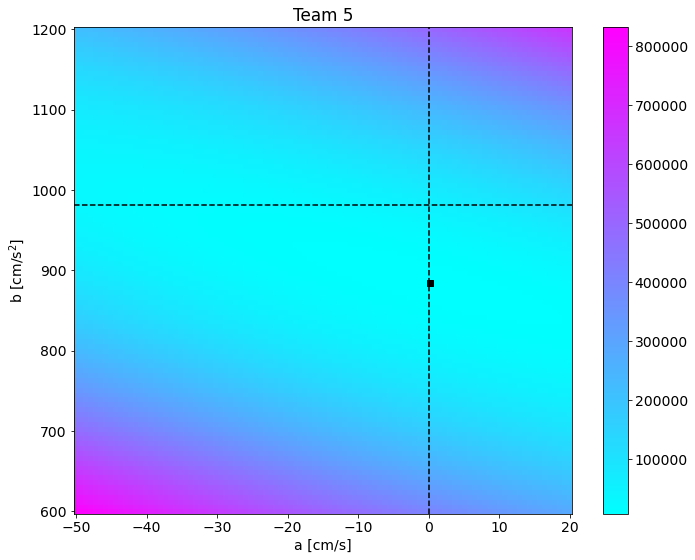

In [268]:
# Which team to analyze
team = 5
# Which ranges for the parameters to explore
a_min, a_max = -50, 20
b_min, b_max = 600, 1200
# How many points to put in the grid
n_a = 100
n_b = 100

# Define the grid
a = numpy.linspace(a_min, a_max, n_a)
b = numpy.linspace(b_min, b_max, n_b)
a_s, b_s = numpy.meshgrid(a, b)

# Error function
def error(a, b, data):
    '''Computes error for single (a,b) pair'''
    ts = data[:,0]
    vs = data[:,1]
    
    vs_th = a + b * ts 
    errs = (vs - vs_th)**2
    
    return numpy.sum(errs)

# Let's compute the error for one team
error_grid = numpy.zeros(a_s.shape)
for i in range(a_s.shape[0]):
    for j in range(a_s.shape[1]):
        error_grid[i,j]=error(a_s[i,j], b_s[i,j], data=avg_speed[avg_speed[:,2]==team])
        
# The location of the minimum error is
error_min        = numpy.min(error_grid)
min_loc          = numpy.where(error_grid==error_min)
row_min, col_min = min_loc[0][0], min_loc[1][0]

        
# plot the result
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
c= ax.pcolormesh(a_s, b_s, error_grid, cmap='cool', shading='auto')
ax.scatter(a[col_min], b[row_min], marker='s', color='k')
plt.colorbar(c)
ax.axhline(981, color='k', linestyle='--')
ax.axvline(0, color='k', linestyle='--')

ax.set_xlabel(r'a [cm/s]'), ax.set_ylabel(r'b [cm/s$^2$]')
ax.set_title(r'Team {}'.format(team))
plt.tight_layout()

This optimization process can be automated. For simple problems, such as fitting a straight line, we do not even need to optimize. Instead, there are formulas that can be derirved (research least squares fitting).

This is what EXCEL allows you to do, when you ask it to do a "best fit line". Let's look at the best fit lines for each team:

In [270]:
# In this case we are going to use the curve_fit method in scipy, because it is 
# quite flexible

# This will take some time to compute...

from scipy.optimize import curve_fit

def model(x, a, b):
    return a + b * x

a_s, b_s, a_errs, b_errs = [], [], [], []
for team in teams[1:]:
    # slice data
    xdata = avg_speed[avg_speed[:,2]==team][:,0]
    ydata = avg_speed[avg_speed[:,2]==team][:,1]
    # compute best fit parameters
    p, pcov = curve_fit(model, xdata, ydata)
    # put them together
    a_s.append(p[0])
    b_s.append(p[1])
    a_errs.append(numpy.sqrt(pcov[0,0]))
    b_errs.append(numpy.sqrt(pcov[1,1]))
a_s    = numpy.array(a_s)
b_s    = numpy.array(b_s)
a_errs = numpy.array(a_errs)
b_errs = numpy.array(b_errs)

In [271]:
# Now we can plot the result for each team

@interact(team=(1,6), data=fixed(avg_speed), a_s=fixed(a_s), b_s=fixed(b_s))
def plot_best_fit(team, data, a_s, b_s):
    
    # slice the data
    data_plot = data[data[:,2]==team]
    # get the parameters
    a = a_s[int(team-1)]
    b = b_s[int(team-1)]
    t_i, t_f = data_plot[:,0][0], data_plot[:,0][-1]
    v_i, v_f = a + b * t_i, a + b * t_f
    
    # plot data
    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot(111)
    ax.scatter(data_plot[:,0], data_plot[:,1], marker='o', color=colors[team])
    ax.plot([t_i, t_f], [v_i, v_f])

    ax.text(0.05,500, r'v = {:.2f} + {:.2f} t'.format(a,b), 
            bbox=dict(facecolor='white', alpha=1.0))
    
    ax.set_xlabel(r"t [s]"), ax.set_ylabel(r"<v> [cm/s]")
    ax.set_ylim((-100,600))
    ax.grid()
    
    plt.show()

interactive(children=(IntSlider(value=3, description='team', max=6, min=1), Output()), _dom_classes=('widget-i…

If you used EXCEL, as a blackbox, the problem is that, while you get an estimate for g tha seems to be pretty good, there is no easy way for you to find an estimate for its uncertainty. 

A possible way out comes from the realization that the output depends on the input, or data points, which is why different teams, with different measurements, will get (slightly) different results:

In [255]:
out = [print(r'Team {} : g = {:.2f} cm/s/s'.format(teams[i+1], b_s[i])) for i in teams[:-1]]

Team 1 : g = 879.70 cm/s/s
Team 2 : g = 958.28 cm/s/s
Team 3 : g = 969.89 cm/s/s
Team 4 : g = 886.99 cm/s/s
Team 5 : g = 885.41 cm/s/s
Team 6 : g = 933.34 cm/s/s


That is, if we run the same experiment many times, we will get a different value for $g$ each time. We can use that as an estimator for $g$, and then use the standard deviation of that estimator as an estimate for the error in the estimator.

The challenge is, you typically do not run the same experiment many times. How can you 'replicate' different experiments from a single one? **Resampling methods** help you do precisely that.

There are several resampling methods (if you are interested, google 'bootstrap' or 'jacknife'). If you use a method that gives you just a single estimate given the data, in this class you will use k-fold means:

#### K-fold resampling method

In this method you split your data in k parts (folds), compute k different estimates, and use the variance of those values as your estimate for the error. For your point estimate (mean) you still use all the data you have.

In this experiment you only had a few average speeds (around 30), so we will only do 5 folds. We just need to be careful that each of the 5 sub-sets is representative of the overall dataset, thus we pick randomly for each one:

In [262]:
# Let's do the computation
numpy.random.seed(seed=1)   # to make this exercise reproducible
k = 5

slope_team     = []
intercept_team = []
index_team     = []
for team in teams[1:]:
    # get the data corresponding to your team
    sub_data = avg_speed[avg_speed[:,2]==team]
    
    # get 5 random samples, comprising of all the points in the data-set
    n_total  = len(sub_data)
    n_sample = n_total // k
    indexes = numpy.arange(n_total)
    numpy.random.shuffle(indexes)
    index_team.append(indexes)
    # do work by cut
    slope_sample     = []
    intercept_sample = []
    for i in range(5):
        if i==k-1:
            indexes_sample = indexes[n_sample*i:]
        else:
            indexes_sample = indexes[n_sample*i:n_sample*(i+1)]
        sample_data = sub_data[indexes_sample]
        # compute slope for that sample
        p, pcov = curve_fit(model, sample_data[:,0], sample_data[:,1])
        slope_sample.append(p[1])
        intercept_sample.append(p[0])
    slope_team.append(slope_sample)
    intercept_team.append(intercept_sample)
slope_team     = numpy.array(slope_team)
intercept_team = numpy.array(intercept_team)
    
# Now we can compute the errors
b_s_errs = numpy.std(slope_team, axis=1)

In [267]:
# Show what the resampling method is actually doing

@interact(team=(1,6), sample=(1,5), data=fixed(avg_speed), a_s=fixed(intercept_team), b_s=fixed(slope_team),
          indexes=fixed(index_team))
def plot_best_fit(team, sample, data, a_s, b_s):
    
    # slice the data
    data_plot = data[data[:,2]==team]
    
    # pick the sample
    
    # get the parameters
    a = intercept_team[team-1][sample-1]
    b = slope_team[team-1][sample-1]
    t_i, t_f = data_plot[:,0][0], data_plot[:,0][-1]
    v_i, v_f = a + b * t_i, a + b * t_f
    
    # plot data
    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot(111)
    ax.scatter(data_plot[:,0], data_plot[:,1], marker='o', color=colors[team])
    ax.scatter(data_plot[indexes[(sample-1)*5:sample*5],0], data_plot[indexes[(sample-1)*5:sample*5],1], 
               marker='*', color='r', s=100)
    ax.plot([t_i, t_f], [v_i, v_f])

    ax.text(0.05,500, r'v = {:.2f} + {:.2f} t'.format(a,b), 
            bbox=dict(facecolor='white', alpha=1.0))
    
    ax.set_xlabel(r"t [s]"), ax.set_ylabel(r"<v> [cm/s]")
    ax.set_ylim((-100,600))
    ax.grid()
    
    plt.show()

interactive(children=(IntSlider(value=3, description='team', max=6, min=1), IntSlider(value=3, description='sa…

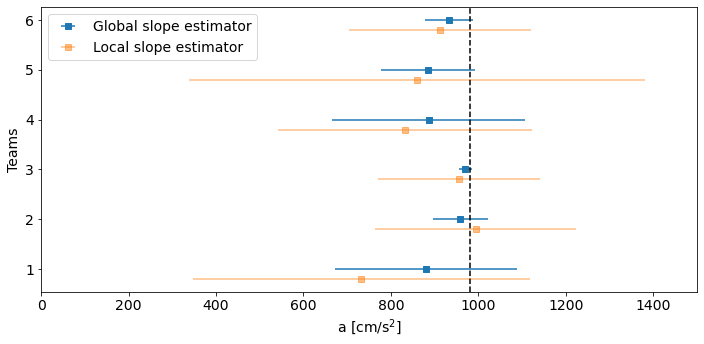

In [238]:
# Let's show the results
n_sigma = 3

fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
ax.errorbar(x=b_s,   y=teams[1:],     xerr=n_sigma * b_s_errs, linestyle='none', 
            marker='s', label=r'Global slope estimator')
ax.errorbar(x=means, y=numpy.array(teams[1:])-0.2, xerr=n_sigma * stderrs,  
            linestyle='none', marker='s', alpha=0.5, label=r'Local slope estimator')
ax.axvline(981, color='k', linestyle='--')
ax.legend(loc=2)

ax.set_xlim(0, 1500)
ax.set_xlabel(r"a [cm/s$^2$]"), ax.set_ylabel(r"Teams")
plt.tight_layout()

It seems that the measurements for most teams, are consistent with the commonly accepted value for $g$ within 3 standard-deviations (the agreement would still be larger with 5 standard deviations).

When comparing to the old estimator, the new estimator seems to be "better" in two aspects:

    1. The estimation for $g$ seems to be less biased
    2. The error in the estimation for $g$ is significantly reduced
    
To understand why this is the case, we need to look again at the plot of average speed vs time.

In [241]:
# Now we can plot the result for each team

@interact(team=(1,6), point=(0,20), data=fixed(avg_speed), a_s=fixed(a_s), b_s=fixed(b_s))
def plot_best_fit(team, point, data, a_s, b_s):
    
    # slice the data
    data_plot = data[data[:,2]==team]
    # get the parameters
    a = a_s[int(team-1)]
    b = b_s[int(team-1)]
    t_i, t_f = data_plot[:,0][0], data_plot[:,0][-1]
    v_i, v_f = a + b * t_i, a + b * t_f
    
    # pick a pair of points
    t_1 = data_plot[:,0][point]
    t_2 = data_plot[:,0][point+1]
    
    v_1 = data_plot[:,1][point]
    v_2 = data_plot[:,1][point+1]
    
    b_point = (v_2 - v_1) / (t_2 - t_1)
    a_point = v_1 - b_point * t_1
    
    v_i_point, v_f_point = a_point + b_point * t_i, a_point + b_point * t_f
    
    # plot data
    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot(111)
    ax.scatter(data_plot[:,0], data_plot[:,1], marker='o', color=colors[team])
    ax.plot([t_i, t_f], [v_i, v_f])
    ax.plot([t_i, t_f], [v_i_point, v_f_point], c='red')

    ax.text(0.05,500, r'v = {:.2f} + {:.2f} t'.format(a,b), 
            bbox=dict(facecolor='white', alpha=1.0))
    
    ax.set_xlabel(r"t [s]"), ax.set_ylabel(r"<v> [cm/s]")
    ax.set_ylim((-100,600))
    ax.grid()
    
    plt.show()

interactive(children=(IntSlider(value=3, description='team', max=6, min=1), IntSlider(value=10, description='p…

You can see how the first methods was equivalent to estimating the slope using just two neighboring points. Since the distance betweeen neighboring points is so small, errors in the measurement of $v_i$ will propagate into large errors in the estimate for the slope.

This is a common situation, magnitudes that are defined as the rate of change of measurements are noisier than the measurements themselves.

This also brings us to the next topic, which is how errors propagate to derived magnitudes.

### Error propagation

When you know the functional relationship between some magnitude of interest and some inputs with known (or estimated) errors, you can use derivatives (and the fact that errors from different inputs cannot cancel) to estimate the error in the magnitude of interest as:

$$y = f(x_1, ..., x_N) \rightarrow \Delta y = \sum_{i=1}^{i=N}\lvert \frac{\partial f}{\partial x_i}\rvert \Delta x_i$$

#### Examples

For a linear relationship, like the one we have been dealing with, we would have:

$$v_i = v_0 - g t_i + \frac{g}{2}\Delta t = v_0 + \left(t_i + \frac{\Delta t}{2}\right) g$$

$$g = \frac{v_i - v_0}{t_i + \frac{\Delta t}{2}}=f(v_i)$$

If we assume that the times are measured with infinite precision (or rather, with much higher precission than the velocities), only $v_i$ contribute to the error. Then, the error from a single velocity measurement would be:

$$\Delta g_i = \frac{\Delta v_i }{t_i + \frac{\Delta t}{2}}$$

We see how points at high $t$ contribute less to the error (makes sense, since it is easier to measure their slope).

The error in the velocity, can also be estimated using error propagation:

$$v_i = \frac{\Delta x_i}{\Delta t}\rightarrow \Delta v_i = \frac{\Delta \Delta x_i}{\Delta t}$$

So, if the error measuring displacements is dominated by the ruler's precision (1 mm) we would have:

$$\Delta v_i = \frac{0.1\,\mathrm{cm}}{\frac{1}{60}\,\mathrm{s}}=6\,\mathrm{\frac{cm}{s}}$$

The smallest and the biggest errors for each measurement of $g$ would be:

$$\Delta g_i^{max} = \frac{\Delta v_i}{\Delta t} =  \frac{6\,\mathrm{\frac{cm}{s}}}{\frac{1}{60}\,\mathrm{s}} = 360\,\mathrm{\frac{cm}{s^2}}$$
$$\Delta g_i^{min} = \frac{\Delta v_i}{t_{max} + \frac{\Delta t}{2}} =  \frac{6\,\mathrm{\frac{cm}{s}}}{(0.5 + \frac{1}{60})\,\mathrm{s}} = 12\,\mathrm{\frac{cm}{s^2}}$$

And the mean error would be
$$\Delta g_i = \frac{\Delta g_i^{min}+\Delta g_i^{max}}{2}=186\,\mathrm{\frac{cm}{s^2}}$$

If we have 30 measurements, the error on the average will be

$$\Delta g = \frac{\Delta g_i}{\sqrt{N}} \approx 34\,\mathrm{\frac{cm}{s^2}}$$

The 3-standard-deviation bars will have a total width of $\approx 200\,\mathrm{\frac{cm}{s^2}}$, which is not that far off what we found using resampling.

### Summary

- Error estimation is an important aspect of experimental physics (and any kind of quantitative analysis, really)

- As a result of errors, measurements and derived quantities become random variables. To be able to characterize a random variable, in general we need repeated measurements.

- Use the (sample) mean as your best estimate for a repeated measurement.

- Use the (sample) standard deviation as an estimate for the measurement error. If that error is zero, chances are you are being limited by the precision of your measuring device. Then use that precision as an estimate for the error.

- When using a 'black-box' method to get an estimate for some derived quantity, use resampling methods, such as k-fold, to get a sense of the underlying uncertainty.

- When using a "formula" to derive some magnitude from a set of measurements, you can use error propagation (together with an estimate for the error in the inputs) to estimate the error on the magnitude.